# PyCaret implementation

In [2]:
from unidecode import unidecode
import pandas as pd

In [3]:
df = pd.read_csv(r"..\CSVs\EditedDataSet.csv", encoding="utf-16")

In [4]:
for col in df:
    df.rename(columns = {col:unidecode(col)}, inplace = True)

In [5]:
data = df.sample(frac=0.8).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1555, 18)
Unseen Data For Predictions: (389, 18)


In [6]:
from pycaret.regression import *

exp_reg101 = setup(data = data, target = 'Pret') 

,Description,Value
0,Session id,5893
1,Target,Pret
2,Target type,Regression
3,Original data shape,"(1555, 18)"
4,Transformed data shape,"(1555, 18)"
5,Transformed train set shape,"(1088, 18)"
6,Transformed test set shape,"(467, 18)"
7,Numeric features,17
8,Rows with missing values,98.6%
9,Preprocess,True


In [7]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,91562.1893,21180463379.0450,144391.6719,0.7253,0.3816,0.3049,0.0640
lightgbm,Light Gradient Boosting Machine,96567.8561,22620034888.6068,149372.7973,0.7075,0.3975,0.3254,0.0890
et,Extra Trees Regressor,91090.4230,22746283756.6433,149760.2493,0.7053,0.3971,0.3070,0.0470
gbr,Gradient Boosting Regressor,102068.7025,22920393436.8669,150105.1646,0.7043,0.4014,0.3533,0.0230
ridge,Ridge Regression,110618.2016,24422591590.4000,154932.6062,0.6851,0.4527,0.3897,0.0060
lr,Linear Regression,110577.5695,24427111936.0000,154946.7211,0.6850,0.4531,0.3897,0.4960
lasso,Lasso Regression,110577.6750,24427086540.8000,154946.6516,0.6850,0.4531,0.3897,0.3030
lar,Least Angle Regression,110577.5930,24427116748.8000,154946.7352,0.6850,0.4531,0.3897,0.0070
llar,Lasso Least Angle Regression,110577.6664,24427084697.6000,154946.6469,0.6850,0.4531,0.3897,0.0070
br,Bayesian Ridge,110719.9930,24536396800.0000,155322.2461,0.6831,0.4472,0.3873,0.0070


RandomForestRegressor(n_jobs=-1, random_state=5893)

In [8]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,86187.6078,16481683267.4787,128381.0082,0.8087,0.3628,0.2970
1,85341.4382,20290796254.2490,142445.7660,0.7750,0.3303,0.2277
2,81566.1711,17904757154.6058,133808.6587,0.6849,0.3784,0.3075
3,90444.8473,21296149925.1820,145932.0045,0.6966,0.3920,0.3446
4,95306.0943,19789057550.3802,140673.5851,0.6923,0.4302,0.3914
5,78860.6443,12941448008.4501,113760.4853,0.8078,0.3615,0.3104
6,101916.1401,31361740505.3934,177092.4632,0.6090,0.4620,0.3139
7,97580.4151,26768661245.6659,163611.3115,0.6614,0.3971,0.2776
8,87186.7842,17745065193.3345,133210.6047,0.8050,0.3310,0.2652


Tuning the model

In [9]:
tuned_rf = tune_model(rf)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,98737.4222,19551188234.0354,139825.5636,0.7731,0.4050,0.3722
1,94507.4210,19393806578.3139,139261.6479,0.7850,0.3386,0.2846
2,91502.7359,17645086246.5839,132834.8081,0.6894,0.4057,0.3815
3,101988.9652,20313921201.9424,142526.9140,0.7106,0.4113,0.4059
4,97023.1795,19687258883.6744,140311.2928,0.6939,0.4425,0.4370
5,88930.1724,13324691540.1520,115432.6277,0.8021,0.3678,0.3502
6,104875.1093,28960732066.4442,170178.5300,0.6390,0.4337,0.3427
7,107402.5576,25564953922.5701,159890.4435,0.6766,0.4100,0.3544
8,96879.0978,18972158685.7991,137739.4594,0.7916,0.3611,0.3221


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Plot model

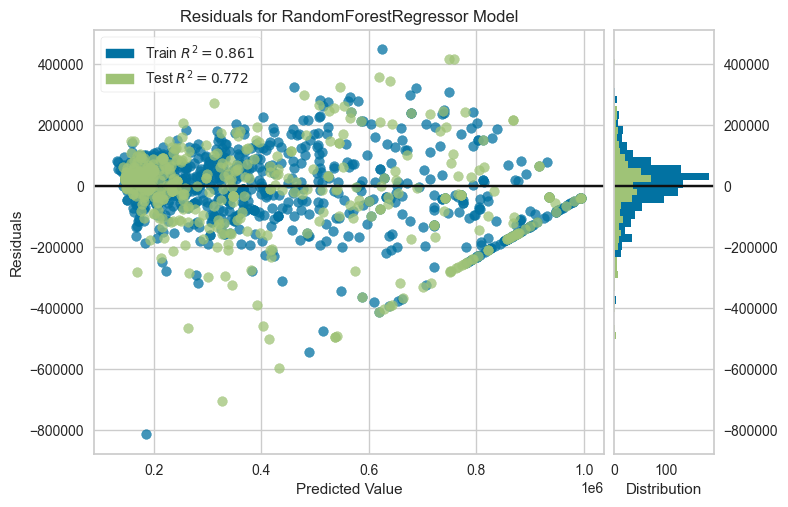

In [10]:
plot_model(tuned_rf)

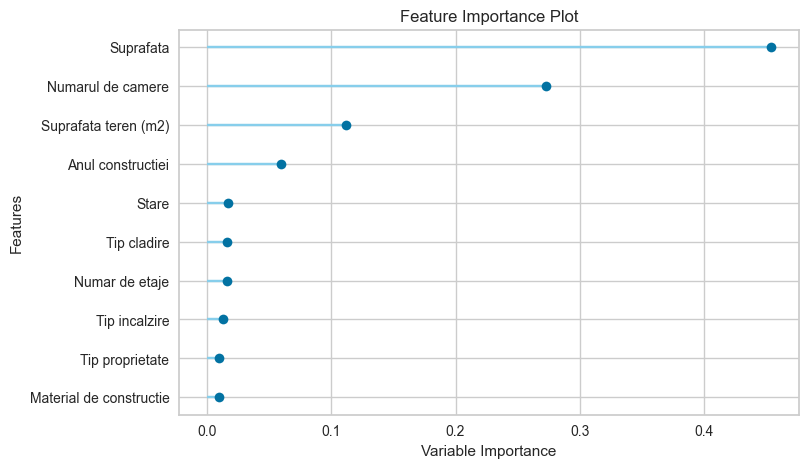

In [11]:
plot_model(tuned_rf, plot='feature')

Prediction

In [12]:
predict_model(tuned_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,97710.5856,20646754693.6502,143689.7863,0.7721,0.4171,0.3930


,Suprafata,Tip incalzire,Suprafata teren (m2),Stare,Tip cladire,Anul constructiei,Numarul de camere,Garaj/loc de parcare,Tip proprietate,Material de constructie,Numar de etaje,Tip acoperis,Acoperis,Tip mansarda,Tip acces,Locatie,Aer conditionat,Pret,prediction_label
1222,145.0,7.0,123.0,1.0,1.0,2023.0,4.0,NaN,2.0,4.0,2.0,5.0,3.0,2.0,1.0,4.0,0,172500.0,185084.022729
616,150.0,7.0,175.0,NaN,5.0,2022.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,199900.0,196958.175491
493,122.0,NaN,200.0,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,145000.0,151164.904499
924,77.0,NaN,200.0,1.0,NaN,1970.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79900.0,157175.627129
617,105.0,NaN,35.0,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,115000.0,147381.213721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,290.0,6.0,600.0,NaN,NaN,2008.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,260000.0,619669.747293
867,155.0,7.0,410.0,1.0,5.0,2023.0,4.0,NaN,2.0,4.0,1.0,6.0,3.0,NaN,1.0,4.0,0,249000.0,233593.669998
1333,501.0,6.0,444.0,1.0,5.0,2021.0,10.0,1.0,2.0,4.0,3.0,6.0,3.0,2.0,1.0,4.0,1,970000.0,934492.651853
60,489.0,7.0,250.0,1.0,5.0,2005.0,8.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0,369000.0,584851.026642


In [13]:
final_rf = finalize_model(tuned_rf)

In [16]:
predict_model(final_rf)

,Suprafata,Tip incalzire,Suprafata teren (m2),Stare,Tip cladire,Anul constructiei,Numarul de camere,Garaj/loc de parcare,Tip proprietate,Material de constructie,Numar de etaje,Tip acoperis,Acoperis,Tip mansarda,Tip acces,Locatie,Aer conditionat,Pret,prediction_label
1222,145.0,7.0,123.0,1.0,1.0,2023.0,4.0,NaN,2.0,4.0,2.0,5.0,3.0,2.0,1.0,4.0,0,172500.0,178733.989448
616,150.0,7.0,175.0,NaN,5.0,2022.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,199900.0,188858.304114
493,122.0,NaN,200.0,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,145000.0,151427.949976
924,77.0,NaN,200.0,1.0,NaN,1970.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79900.0,153467.143055
617,105.0,NaN,35.0,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,115000.0,146247.719171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,290.0,6.0,600.0,NaN,NaN,2008.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,260000.0,497712.883246
867,155.0,7.0,410.0,1.0,5.0,2023.0,4.0,NaN,2.0,4.0,1.0,6.0,3.0,NaN,1.0,4.0,0,249000.0,229203.544018
1333,501.0,6.0,444.0,1.0,5.0,2021.0,10.0,1.0,2.0,4.0,3.0,6.0,3.0,2.0,1.0,4.0,1,970000.0,957387.227535
60,489.0,7.0,250.0,1.0,5.0,2005.0,8.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0,369000.0,557873.758706


In [17]:
unseen_predictions = predict_model(final_rf, data = data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,81456.7242,13891522188.1863,117862.3018,0.8045,0.3666,0.3363


,Suprafata,Tip incalzire,Suprafata teren (m2),Stare,Tip cladire,Anul constructiei,Numarul de camere,Garaj/loc de parcare,Tip proprietate,Material de constructie,Numar de etaje,Tip acoperis,Acoperis,Tip mansarda,Tip acces,Locatie,Aer conditionat,Pret,prediction_label
0,310.0,2.0,280.0,NaN,5.0,2015.0,8.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0,380000.0,493396.912387
1,220.0,NaN,453.0,1.0,NaN,2023.0,5.0,NaN,3.0,NaN,1.0,NaN,3.0,NaN,3.0,NaN,0,372000.0,348803.978441
2,200.0,7.0,280.0,1.0,5.0,2022.0,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,154900.0,247873.669294
3,110.0,NaN,190.0,NaN,5.0,2010.0,3.0,NaN,2.0,7.0,NaN,NaN,3.0,NaN,NaN,NaN,1,290000.0,200633.596460
4,107.0,NaN,100.0,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,115000.0,147834.126114
